# Задание
*Без поражений - нет побед*

Определить количество независимых функций, визуализировать выводы, обосновать

Исходные данные - ```task3.dat```  
1000 строк х 300 столбцов -> 1000 функций

# Решение

Используемые библиотеки

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

Считывание данных

In [2]:
dataset = open('task3.dat')
funcs = []
for line in dataset:
  funcs.append([float(i) for i in line.split()])

dataset.close()

Как выглядят функции

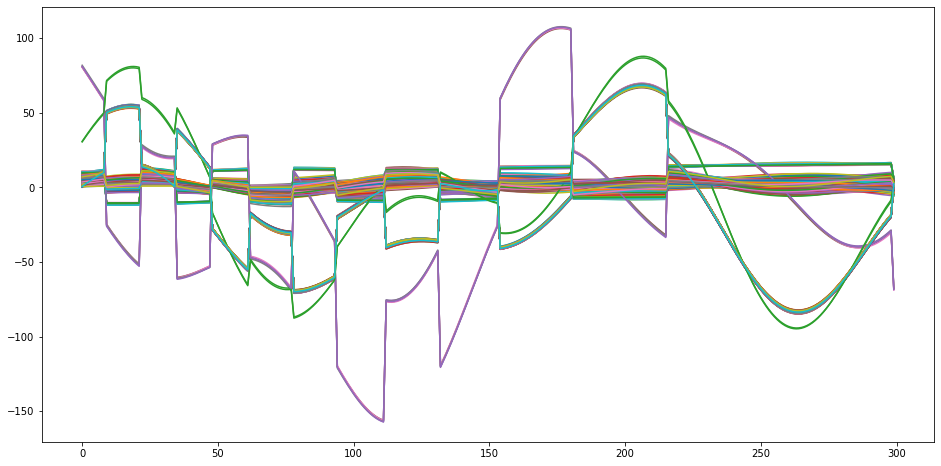

In [3]:
import matplotlib.pyplot as plt
import numpy as np
y = np.linspace(0,1,300)
plt.figure(figsize=(16,8))
for func in funcs:
  plt.plot(func)
plt.show()

Стандартизация данных

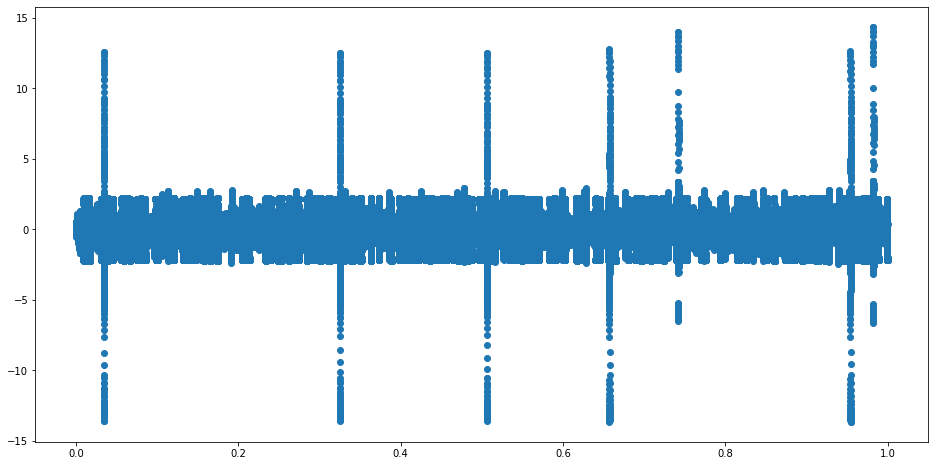

In [4]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(funcs)

Y = np.linspace(0,1,X.size)
plt.figure(figsize=(16,8))
plt.scatter(Y, X)

Поиск подходящего epsilon для DBSKAN

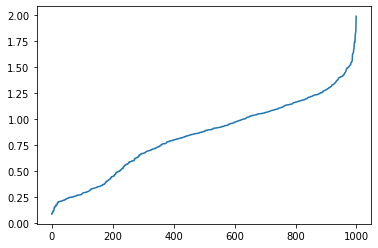

In [5]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances,indices = nbrs.kneighbors(X)

distances = np.sort(distances,axis=0)
z = plt.plot(distances[:,1])

Классы, найденные DBSKAN

In [6]:
import numpy as np
from sklearn.cluster import DBSCAN

cl = DBSCAN(eps=1.50)
c = cl.fit_predict(X)
print(np.unique(c))

[-1  0  1  2  3]


Результат

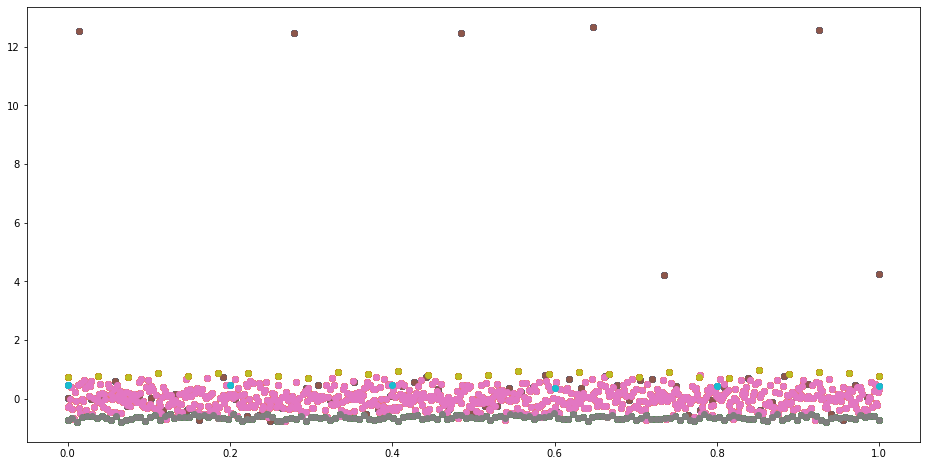

In [8]:
plt.figure(figsize=(16,8))
for i in range(len(c)):
  for class_value in range(-1,4):
    y_x = np.linspace(0,1,X[c==class_value,0].size)
    fig = plt.scatter(y_x, X[c==class_value,0])
plt.savefig('result.png')
plt.show()
plt.close()

Семь отдалённых точек и есть независимые функции